## Loading the iris dataset into scikit-learn

In [ ]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)
# print the iris data
print(iris.data)
# print the names of the four features
print(iris.feature_names)
# print integers representing the species of each observation
print(iris.target)
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

## Requirements for working with data in scikit-learn

1. Features and response are **separate objects**
2. Features should always be **numeric**, and response should be **numeric** for regression problems
3. Features and response should be **NumPy arrays**
4. Features and response should have **specific shapes**: 

- Features have 2 dimensions (first = number of observations, second = number of features) (150, 4)
- Response has one dimension (single = number of observations) (150,)

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris.data))
print(type(iris.target))
print(iris.data.shape)
print(iris.target.shape)

X = iris.data
y = iris.target

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]

## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

**Step 2:** "Instantiate" the "estimator"

**Step 3:** Fit the model with data ("model training")

**Step 4:** Predict the response for a new observation

In [ ]:
## KNN Classification

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.predict(X_new)

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X, y)
logreg.predict(X_new)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

## Train/test split

In [ ]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# STEP 2: train the model on the training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# STEP 3: make predictions on test
y_pred = knn.predict(X_test)

# STEP 4: compare y_test with y_pred
print(metrics.accuracy_score(y_test, y_pred))

# Optimal K ?

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

    
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.show()

## Downsides of train/test split?
- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('../data/Advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Visualizing data using seaborn

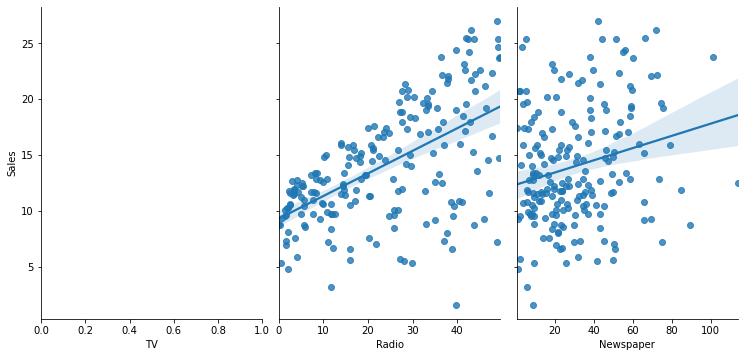

In [9]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response 
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], height=5, aspect=0.7, kind='reg')

## Linear regression in scikit-learn

In [10]:
# In scikit-learn, X can be a pandas DataFrame and y can be a pandas Series!
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


# Calculate MAE, MSE, RMSE
from sklearn import metrics

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
print(MAE, MSE, RMSE)

1.0668917082595206 1.9730456202283368 1.0329045010355606


### Interpreting model coefficients
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

In [11]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

feature_cols=['TV', 'Radio', 'Newspaper']
list(zip(feature_cols, linreg.coef_))

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

## Feature selection

- Does **Newspaper** "belong" in our model? Does it improve the quality of our predictions? 

- Let's **remove it** from the model and check the RMSE!

- The RMSE **decreases** when we remove Newspaper from the model. Thus, this feature is not useful for predicting Sales and should be removed from the model.

In [ ]:
X = data[['TV', 'Radio']]
y = data[['Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
print(MAE, MSE, RMSE)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

## Cross-validation recommendations:

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## 1. Cross-validation: Hyperparameter Tuning

**Goal:** Select the best tuning hyperparameters for KNN on the iris dataset

In [ ]:
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## 2. Cross-validation: Model Selection

**Goal:** Compare the best KNN model (K=20) with logistic regression on the iris dataset

In [ ]:
# 10-fold cv with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)

# 10-fold cv with logistic regression
logreg = LogisticRegression(solver='liblinear')

print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

## 3. Cross-validation : Feature Selection

**Goal**: whether the "Newspaper" feature should be included in the linear regression model on the advertising dataset

In [ ]:
data = pd.read_csv('../data/Advertising.csv', index_col=0)
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

# 10-fold cv with all features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

# 10-fold cv with two features (excluding Newspaper)
X = data[['TV', 'Radio']]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

## Parameter tuning with `cross_val_score`
**Goal:** Select the best hyperparameters for KNN on the iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

iris = load_iris()
X = iris.data
y = iris.target

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Parameter tuning with `GridSearchCV` (multiple)

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`. Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa


In [ ]:
# 1. Define a parameter grid: 
param_grid = dict(n_neighbors=list(range(1, 31)), weights=['uniform', 'distance'])

# 2. Instantiate and fit the grid:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# 3. Get the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

## Classification accuracy

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

path = '../data/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

X = pima[['pregnant', 'insulin', 'bmi', 'age']]
y = pima[['label']]
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(metrics.accuracy_score(y_test, y_pred_class)) 
print(metrics.recall_score(y_test, y_pred_class))
print(metrics.precision_score(y_test, y_pred_class))

## Adjusting Classification Threshold

- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because FN are more acceptable than FP 
- **Fraud transaction** (positive class is "fraud"): Optimize for **sensitivity** because FP are more acceptable than FN

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

In [ ]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# predict diabetes if predict_proba > 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]

# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

## ROC and AUC


- ROC curve helps to **choose a threshold** that balances sensitivity and specificity.
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

- AUC represents the likelihood that your classifier will assign a **higher predicted probability** to positive observations.
- AUC is useful when there is **high class imbalance**.

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

print(metrics.roc_auc_score(y_test, y_pred_prob))

In [1]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df = pd.read_csv('http://bit.ly/kaggletrain')
df = df.loc[df.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked']]
X = df.drop('Survived', axis='columns')
y = df.Survived

column_trans = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), remainder='passthrough')
logreg = LogisticRegression(solver='lbfgs')
pipe = make_pipeline(column_trans, logreg)
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()
X_new = X.sample(5, random_state=99)
pipe.fit(X, y)
pipe.predict(X_new)

array([1, 0, 1, 1, 0])

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Sex', 'Embarked'])])

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
